In [8]:
import cv2
import numpy as np 
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [9]:
image_path = '../output_videos/cropped_image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

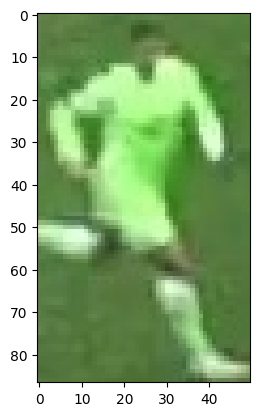

In [10]:
plt.imshow(image)
plt.show()

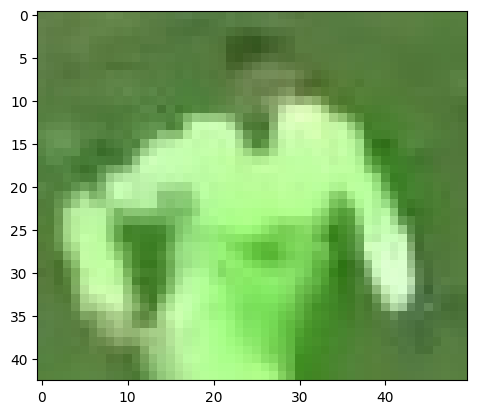

In [11]:
top_half_img = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_img)
plt.show()

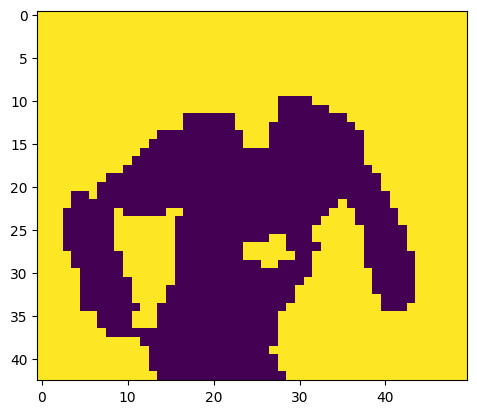

In [15]:
image_2d = top_half_img.reshape(-1,3)

kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

# get the clustered lables
labels = kmeans.labels_

#reshape the labels into original image shape
clustered_image = labels.reshape(top_half_img.shape[0],image.shape[1])

#Display clustered image
plt.imshow(clustered_image)
plt.show()



In [19]:
clustered_image[0,0]

np.int32(1)

In [20]:
corners = [clustered_image[0,0],
           clustered_image[0,-1],
           clustered_image[-1,0],
           clustered_image[-1,-1]]

non_player_cluster = np.max(corners)
non_player_cluster

np.int32(1)

In [21]:
kmeans.cluster_centers_

array([[170.09530201, 235.49530201, 141.95033557],
       [ 85.7024911 , 131.24626335,  61.75231317]])

In [23]:
player_cluster = 1 - non_player_cluster
player_cluster_mean = kmeans.cluster_centers_[player_cluster]
player_cluster_mean

array([170.09530201, 235.49530201, 141.95033557])

In [25]:
non_player_cluster_mean = kmeans.cluster_centers_[non_player_cluster]
non_player_cluster_mean

array([ 85.7024911 , 131.24626335,  61.75231317])